In [1]:
!pip install -q tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("Original shapes:")
print(" x_train:", x_train.shape, " y_train:", y_train.shape)
print(" x_test :", x_test.shape, " y_test :", y_test.shape)

x_train_norm = x_train.astype("float32") / 255.0
x_test_norm  = x_test.astype("float32") / 255.0

print("\nAfter normalization: dtype =", x_train_norm.dtype,
      " min =", x_train_norm.min(), " max =", x_train_norm.max())


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Original shapes:
 x_train: (60000, 28, 28)  y_train: (60000,)
 x_test : (10000, 28, 28)  y_test : (10000,)

After normalization: dtype = float32  min = 0.0  max = 1.0


In [4]:
x_train_mlp = x_train_norm.reshape((-1, 28*28))
x_test_mlp  = x_test_norm.reshape((-1, 28*28))

print("\nMLP input shapes (flattened):")
print(" x_train_mlp:", x_train_mlp.shape)
print(" x_test_mlp :", x_test_mlp.shape)


MLP input shapes (flattened):
 x_train_mlp: (60000, 784)
 x_test_mlp : (10000, 784)


In [5]:
x_train_cnn = x_train_norm.reshape((-1, 28, 28, 1))
x_test_cnn  = x_test_norm.reshape((-1, 28, 28, 1))

print("\nCNN input shapes (with channel dim):")
print(" x_train_cnn:", x_train_cnn.shape)
print(" x_test_cnn :", x_test_cnn.shape)


CNN input shapes (with channel dim):
 x_train_cnn: (60000, 28, 28, 1)
 x_test_cnn : (10000, 28, 28, 1)


In [6]:
num_classes = len(np.unique(y_train))
print(f"\nNumber of classes: {num_classes}")
print("Train examples:", x_train.shape[0], " Test examples:", x_test.shape[0])


Number of classes: 10
Train examples: 60000  Test examples: 10000


# **TASK 2**

In [7]:
mlp_model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(28*28,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

mlp_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

print("=== MLP model summary ===")
mlp_model.summary()
print("Total params (from model.count_params):", mlp_model.count_params())

=== MLP model summary ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Total params (from model.count_params): 235146


In [8]:
cnn_model = keras.Sequential([
    layers.Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

print("=== CNN model summary ===")
cnn_model.summary()
print("Total params (from model.count_params):", cnn_model.count_params())


=== CNN model summary ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,714 (221.54 KB)

 Trainable params: 56,714 (221.54 KB)

 Non-trainable params: 0 (0.00 B)

Total params (from model.count_params): 56714


# **TASK 3**

In [9]:
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

x_train_mlp = x_train.reshape((-1, 28*28))
x_test_mlp  = x_test.reshape((-1, 28*28))

x_train_cnn = x_train.reshape((-1, 28, 28, 1))
x_test_cnn  = x_test.reshape((-1, 28, 28, 1))


In [10]:
epochs = 5
batch_size = 64

history_mlp = mlp_model.fit(
    x_train_mlp, y_train,
    validation_split=0.1,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2
)


Epoch 1/5
844/844 - 7s - 9ms/step - accuracy: 0.8227 - loss: 0.4958 - val_accuracy: 0.8482 - val_loss: 0.4098
Epoch 2/5
844/844 - 9s - 11ms/step - accuracy: 0.8669 - loss: 0.3644 - val_accuracy: 0.8712 - val_loss: 0.3630
Epoch 3/5
844/844 - 11s - 13ms/step - accuracy: 0.8784 - loss: 0.3268 - val_accuracy: 0.8695 - val_loss: 0.3487
Epoch 4/5
844/844 - 6s - 7ms/step - accuracy: 0.8881 - loss: 0.3037 - val_accuracy: 0.8795 - val_loss: 0.3320
Epoch 5/5
844/844 - 8s - 9ms/step - accuracy: 0.8930 - loss: 0.2857 - val_accuracy: 0.8833 - val_loss: 0.3244


In [11]:
history_cnn = cnn_model.fit(
    x_train_cnn, y_train,
    validation_split=0.1,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2
)

Epoch 1/5
844/844 - 28s - 33ms/step - accuracy: 0.7956 - loss: 0.5708 - val_accuracy: 0.8388 - val_loss: 0.4441
Epoch 2/5
844/844 - 27s - 32ms/step - accuracy: 0.8619 - loss: 0.3811 - val_accuracy: 0.8738 - val_loss: 0.3472
Epoch 3/5
844/844 - 40s - 48ms/step - accuracy: 0.8762 - loss: 0.3379 - val_accuracy: 0.8805 - val_loss: 0.3303
Epoch 4/5
844/844 - 40s - 48ms/step - accuracy: 0.8875 - loss: 0.3078 - val_accuracy: 0.8827 - val_loss: 0.3204
Epoch 5/5
844/844 - 26s - 30ms/step - accuracy: 0.8946 - loss: 0.2862 - val_accuracy: 0.8902 - val_loss: 0.2980


In [12]:
print("Evaluating MLP on test set (flattened)...")
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(x_test_mlp, y_test, verbose=2)
print(f"MLP Test loss: {mlp_test_loss:.4f}   MLP Test accuracy: {mlp_test_acc:.4f}")

print("\nEvaluating CNN on test set (images with channel dim)...")
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test, verbose=2)
print(f"CNN Test loss: {cnn_test_loss:.4f}   CNN Test accuracy: {cnn_test_acc:.4f}")

Evaluating MLP on test set (flattened)...
313/313 - 2s - 6ms/step - accuracy: 0.8815 - loss: 0.3428
MLP Test loss: 0.3428   MLP Test accuracy: 0.8815

Evaluating CNN on test set (images with channel dim)...
313/313 - 2s - 6ms/step - accuracy: 0.8857 - loss: 0.3140
CNN Test loss: 0.3140   CNN Test accuracy: 0.8857


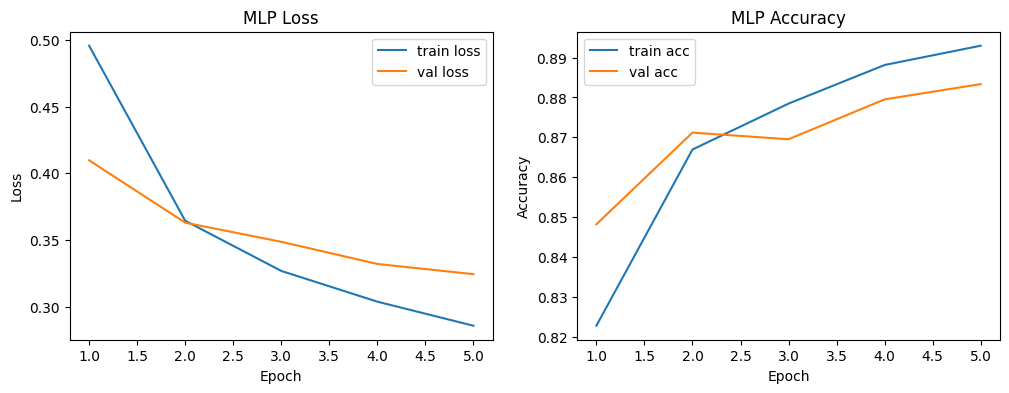

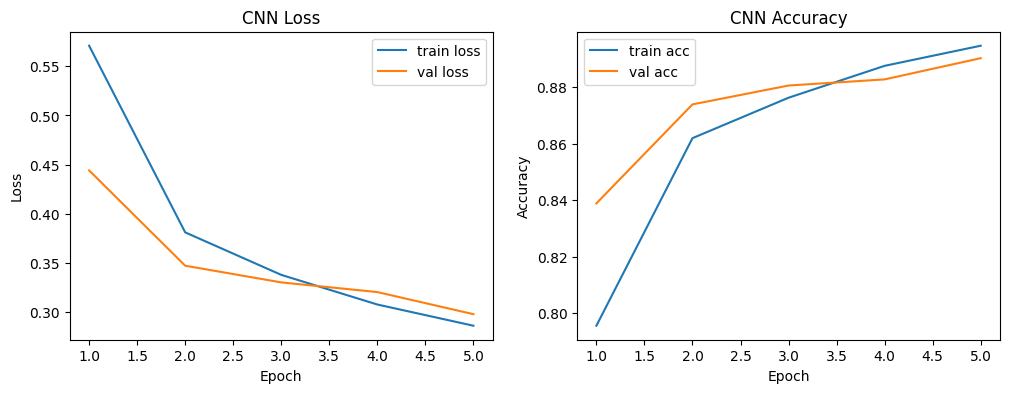

In [13]:
def plot_history(hist, title_prefix="Model"):
    epochs = range(1, len(hist['loss'])+1)
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, hist['loss'], label='train loss')
    if 'val_loss' in hist: plt.plot(epochs, hist['val_loss'], label='val loss')
    plt.title(f"{title_prefix} Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, hist['accuracy'], label='train acc')
    if 'val_accuracy' in hist: plt.plot(epochs, hist['val_accuracy'], label='val acc')
    plt.title(f"{title_prefix} Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

plot_history(history_mlp.history, "MLP")
plot_history(history_cnn.history, "CNN")

In [14]:
mlp_model.save('mlp_model.h5')
cnn_model.save('cnn_model.h5')
print("Saved mlp_model.h5 and cnn_model.h5")

Saved mlp_model.h5 and cnn_model.h5


In [15]:
import os

mlp_size_bytes = os.path.getsize('mlp_model.h5')
cnn_size_bytes = os.path.getsize('cnn_model.h5')

def bytes_to_mb(b): return b / (1024**2)

print(f"mlp_model.h5 size: {mlp_size_bytes} bytes = {bytes_to_mb(mlp_size_bytes):.3f} MB")
print(f"cnn_model.h5  size: {cnn_size_bytes} bytes = {bytes_to_mb(cnn_size_bytes):.3f} MB")


mlp_model.h5 size: 2849008 bytes = 2.717 MB
cnn_model.h5  size: 720832 bytes = 0.687 MB


In [16]:
import tensorflow as tf
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

def get_flops(model, input_shape):

    concrete = tf.function(lambda x: model(x)).get_concrete_function(tf.TensorSpec(input_shape, tf.float32))
    frozen_func, graph_def = convert_variables_to_constants_v2(concrete), None

    try:
        from tensorflow.python.profiler import model_analyzer
        from tensorflow.python.profiler.option_builder import ProfileOptionBuilder
        graph = frozen_func.graph
        run_meta = tf.compat.v1.RunMetadata()
        opts = ProfileOptionBuilder.float_operation()
        flops = model_analyzer.profile(graph=graph, run_meta=run_meta, cmd='op', options=opts)
        return flops.total_float_ops
    except Exception as e:
        print("tf profiler not available or failed:", e)
        return None



In [17]:
mlp_params = mlp_model.count_params()
cnn_params = cnn_model.count_params()

bytes_per_param = 4
mlp_weights_bytes = mlp_params * bytes_per_param
cnn_weights_bytes = cnn_params * bytes_per_param

print("MLP params:", mlp_params, "-> weights only:", mlp_weights_bytes, "bytes ->",
      mlp_weights_bytes/(1024**2), "MB")
print("CNN params:", cnn_params, "-> weights only:", cnn_weights_bytes, "bytes ->",
      cnn_weights_bytes/(1024**2), "MB")


MLP params: 235146 -> weights only: 940584 bytes -> 0.8970108032226562 MB
CNN params: 56714 -> weights only: 226856 bytes -> 0.21634674072265625 MB
